In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Colored Scatterplots

In [142]:
iris = pd.read_csv('../datasets/iris.csv')
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
123,124,6.3,2.7,4.9,1.8,Iris-virginica
29,30,4.7,3.2,1.6,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
111,112,6.4,2.7,5.3,1.9,Iris-virginica
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [143]:
iris['Species'] = iris['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
iris.sample(5)

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_91932/572492303.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['Species'] = iris['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
71,72,6.1,2.8,4.0,1.3,1
99,100,5.7,2.8,4.1,1.3,1
111,112,6.4,2.7,5.3,1.9,2
12,13,4.8,3.0,1.4,0.1,0
117,118,7.7,3.8,6.7,2.2,2


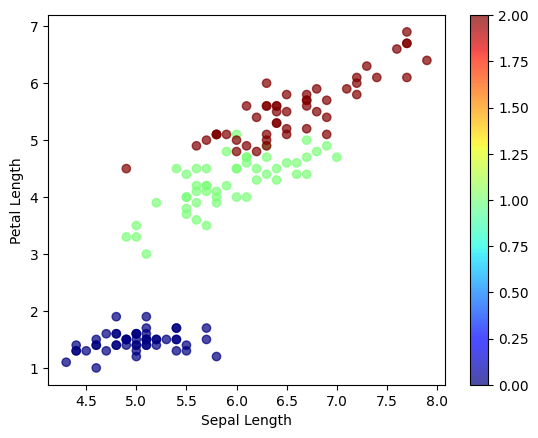

In [144]:
plt.scatter(iris['SepalLengthCm'],iris['PetalLengthCm'],c=iris['Species'],cmap='jet',alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.colorbar()

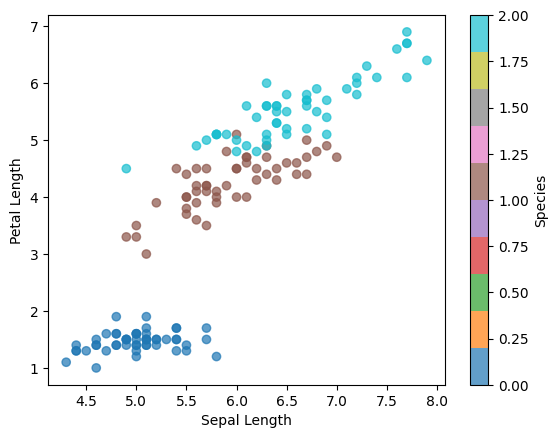

In [145]:
iris['Species_code'] = iris['Species'].astype('category').cat.codes

plt.scatter(
    iris['SepalLengthCm'],
    iris['PetalLengthCm'],
    c=iris['Species_code'],
    cmap='tab10',   # better for categories
    alpha=0.7
)

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.colorbar(label='Species')
plt.show()


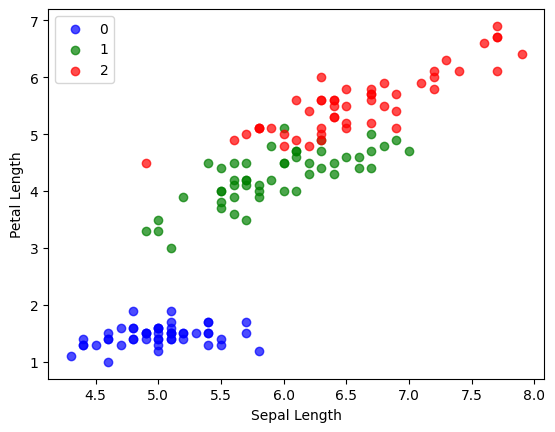

In [146]:
for species, color in zip(iris['Species'].unique(), ['blue','green','red']):
    subset = iris[iris['Species'] == species]
    plt.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        label=species,
        color=color,
        alpha=0.7
    )

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()


### Plot size

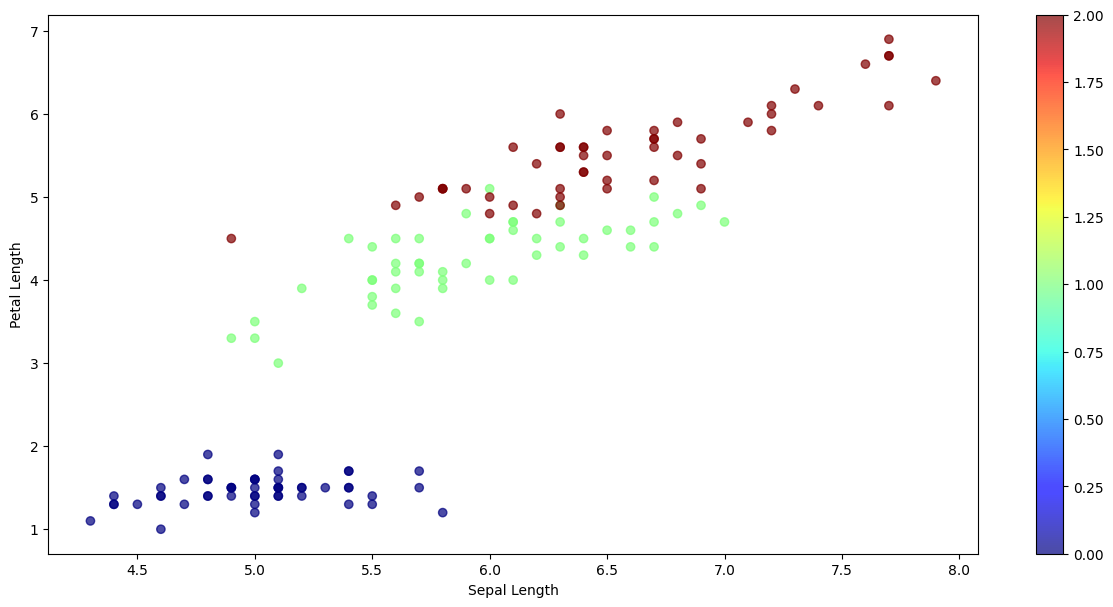

In [147]:
plt.figure(figsize=(15,7))

plt.scatter(iris['SepalLengthCm'],iris['PetalLengthCm'],c=iris['Species'],cmap='jet',alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.colorbar()

In [148]:
batters = pd.read_csv('../datasets/batter.csv')
batters.head()

,batter,runs,avg,strike_rate
0,V Kohli,6634,36.251366,125.977972
1,S Dhawan,6244,34.882682,122.840842
2,DA Warner,5883,41.429577,136.401577
3,RG Sharma,5881,30.314433,126.964594
4,SK Raina,5536,32.374269,132.535312


In [149]:
batters.shape

(605, 4)

In [150]:
sample_df = batters.head(100).sample(25,random_state=5)

In [151]:
sample_df

,batter,runs,avg,strike_rate
66,KH Pandya,1326,22.100000,132.203390
32,SE Marsh,2489,39.507937,130.109775
46,JP Duminy,2029,39.784314,120.773810
28,SA Yadav,2644,29.707865,134.009123
74,IK Pathan,1150,21.698113,116.751269
23,JC Buttler,2832,39.333333,144.859335
10,G Gambhir,4217,31.007353,119.665153
20,BB McCullum,2882,27.711538,126.848592
17,KA Pollard,3437,28.404959,140.457703
35,WP Saha,2427,25.281250,124.397745


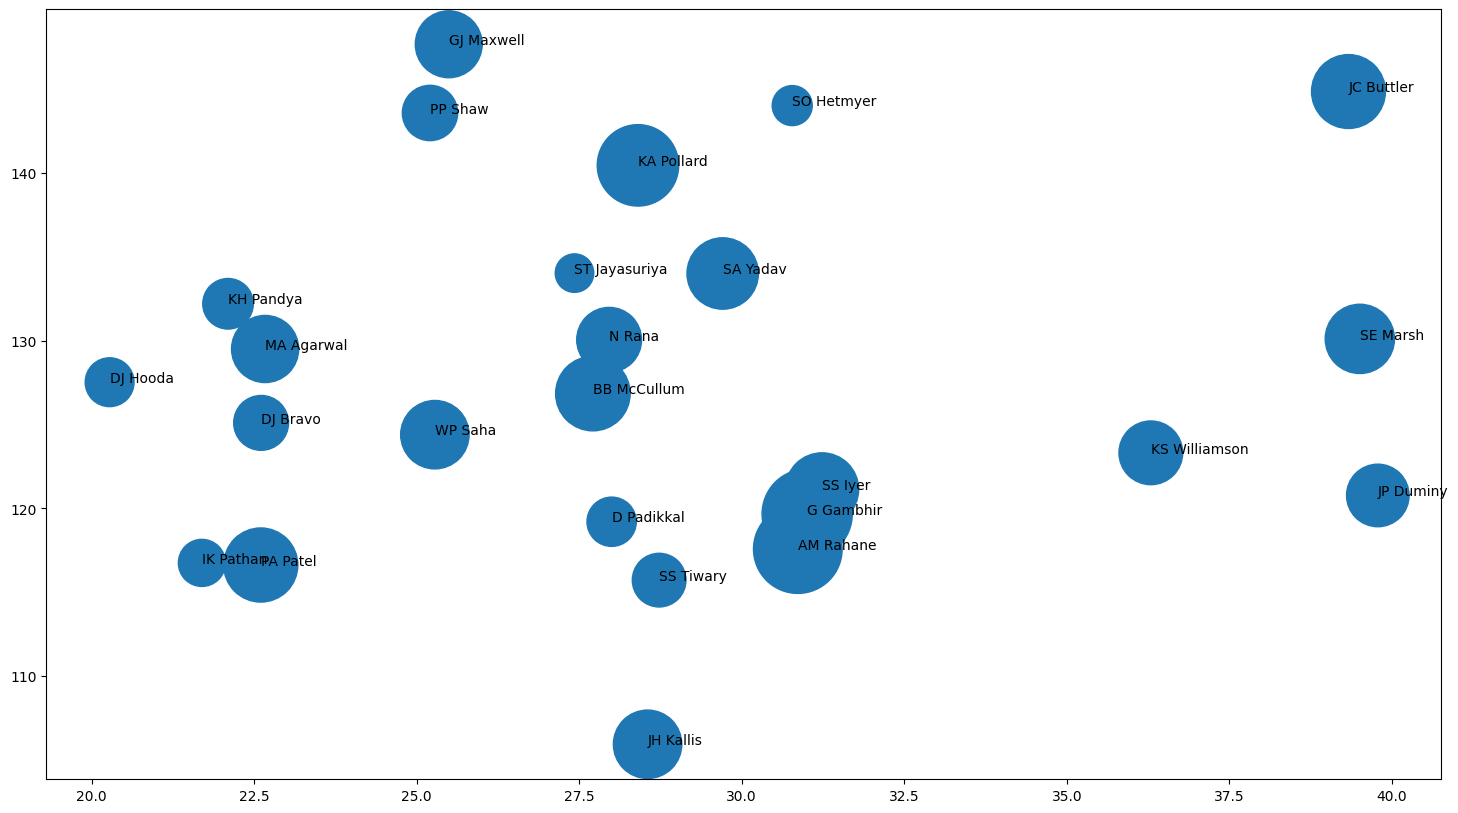

In [152]:
plt.figure(figsize=(18,10))
plt.scatter(sample_df['avg'],sample_df['strike_rate'],s=sample_df['runs'])

for i in range(sample_df.shape[0]):
  plt.text(sample_df['avg'].values[i],sample_df['strike_rate'].values[i],sample_df['batter'].values[i])

In [153]:
sample_df.shape[0]

25

Text(4, 8, 'Point 4')

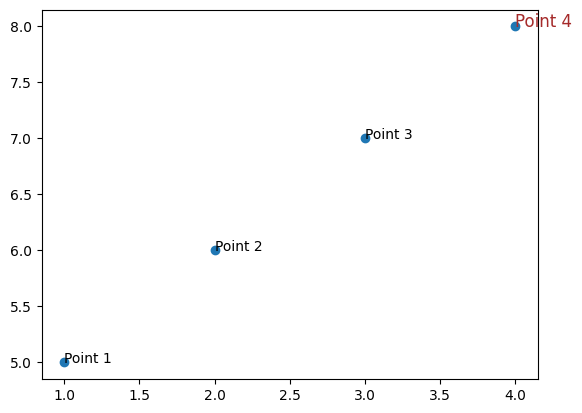

In [154]:
x = [1,2,3,4]
y = [5,6,7,8]

plt.scatter(x,y)
plt.text(1,5,'Point 1')
plt.text(2,6,'Point 2')
plt.text(3,7,'Point 3')
plt.text(4,8,'Point 4',fontdict={'size':12,'color':'brown'})

### Horizontal and Vertical lines

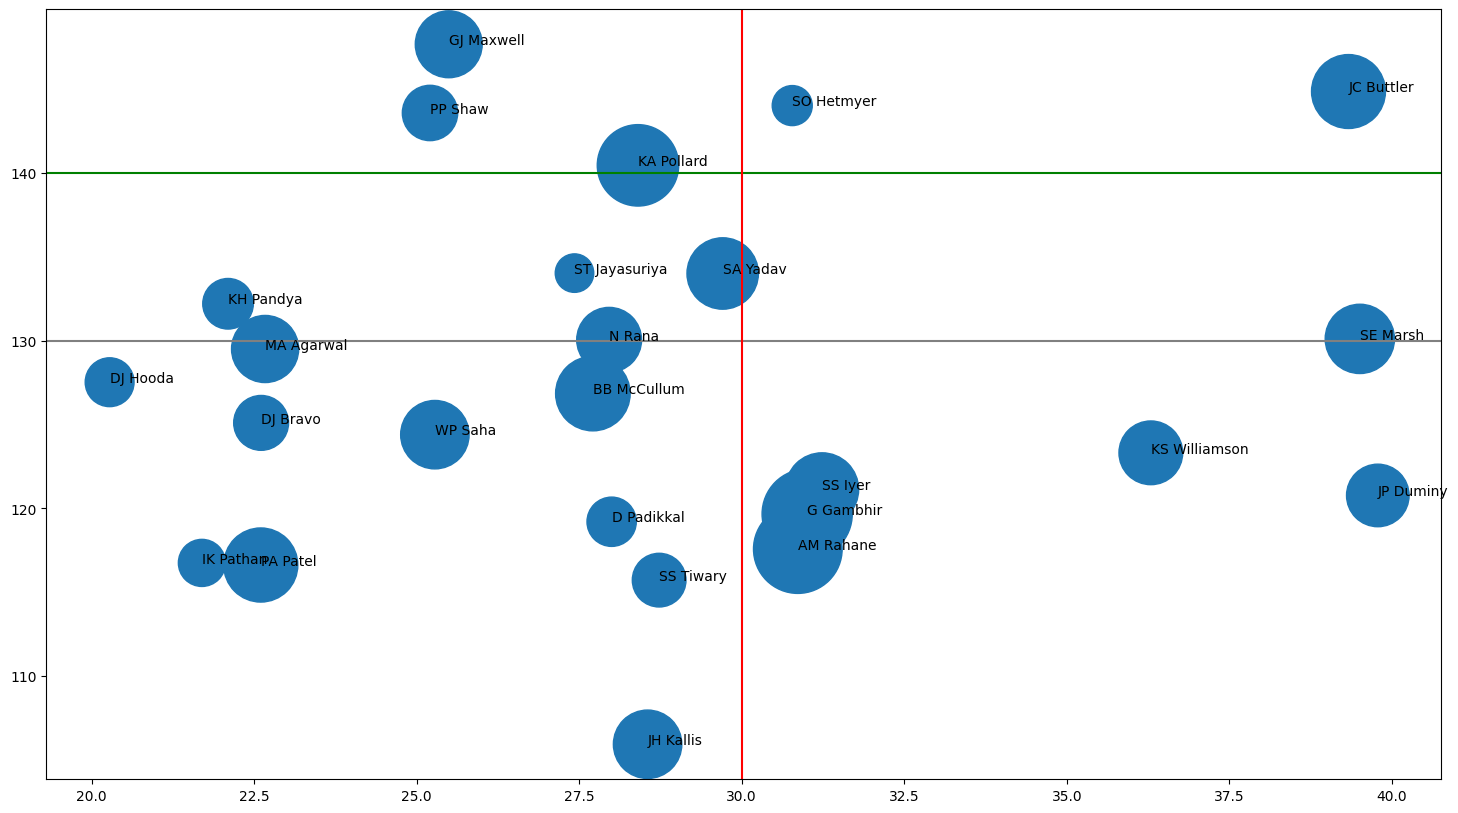

In [155]:
plt.figure(figsize=(18,10))
plt.scatter(sample_df['avg'],sample_df['strike_rate'],s=sample_df['runs'])

plt.axhline(130,color='grey')
plt.axhline(140,color='green')
plt.axvline(30,color='red')

for i in range(sample_df.shape[0]):
  plt.text(sample_df['avg'].values[i],sample_df['strike_rate'].values[i],sample_df['batter'].values[i])

### Subplots

In [156]:
# A diff way to plot graphs
batters.head()

,batter,runs,avg,strike_rate
0,V Kohli,6634,36.251366,125.977972
1,S Dhawan,6244,34.882682,122.840842
2,DA Warner,5883,41.429577,136.401577
3,RG Sharma,5881,30.314433,126.964594
4,SK Raina,5536,32.374269,132.535312


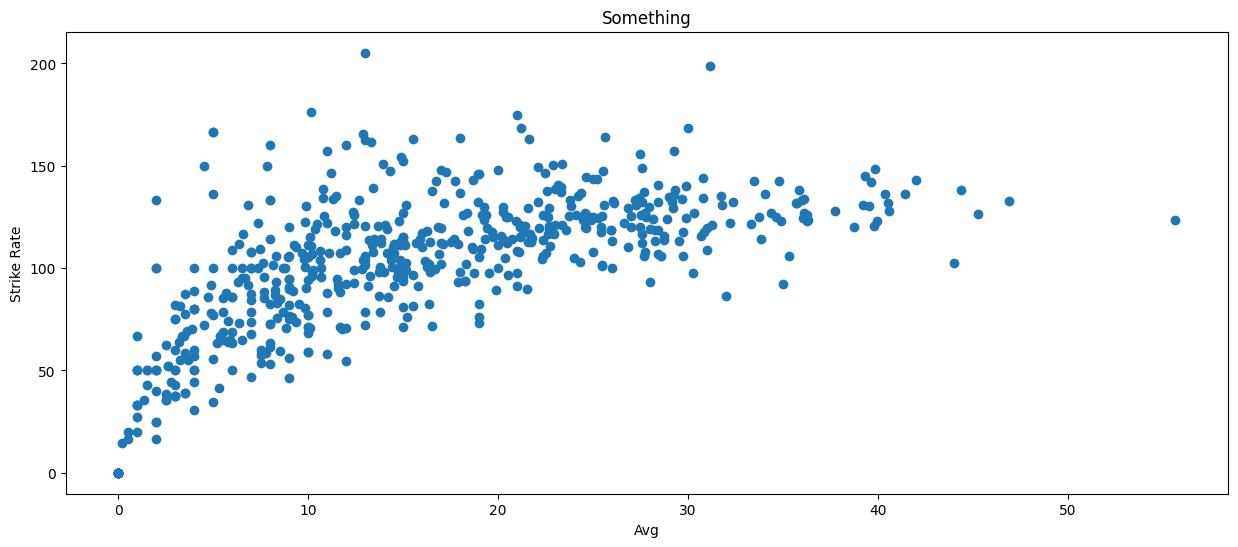

In [157]:
plt.figure(figsize=(15,6))
plt.scatter(batters['avg'],batters['strike_rate'])
plt.title('Something')
plt.xlabel('Avg')
plt.ylabel('Strike Rate')

plt.show()

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_91932/3179312453.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


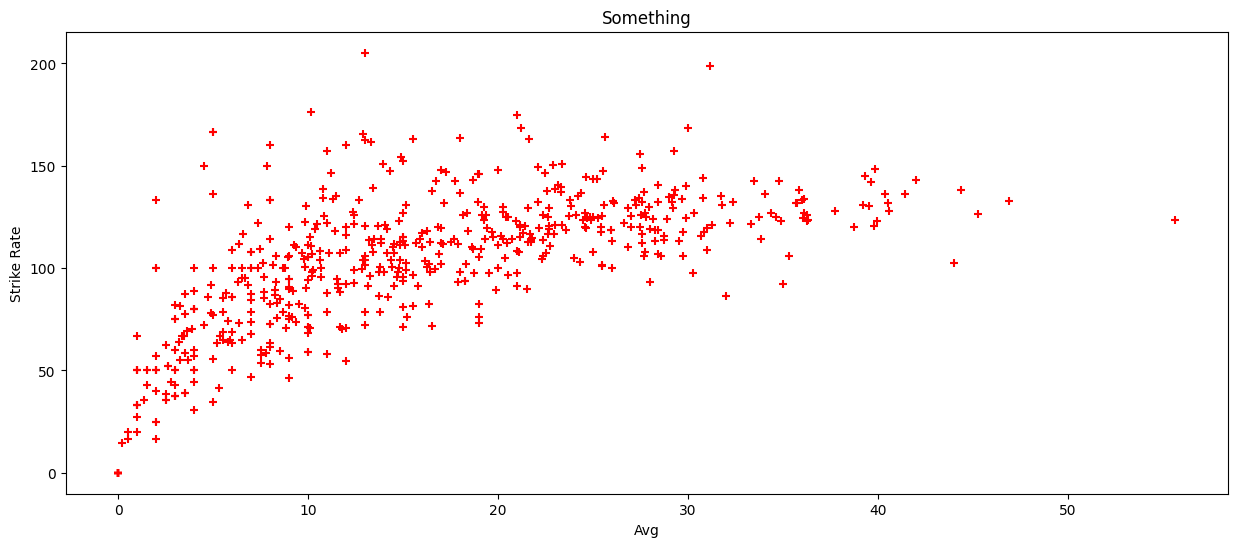

In [158]:
fig,ax = plt.subplots(figsize=(15,6))

ax.scatter(batters['avg'],batters['strike_rate'],color='red',marker='+')
ax.set_title('Something')
ax.set_xlabel('Avg')
ax.set_ylabel('Strike Rate')

fig.show()

Text(0.5, 0, 'Avg')

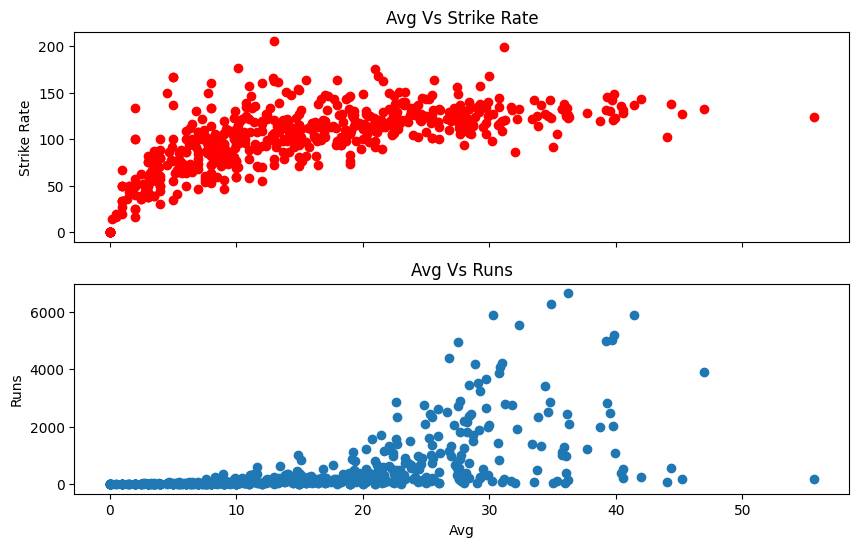

In [159]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(10,6))

ax[0].scatter(batters['avg'],batters['strike_rate'],color='red')
ax[1].scatter(batters['avg'],batters['runs'])

ax[0].set_title('Avg Vs Strike Rate')
ax[0].set_ylabel('Strike Rate')


ax[1].set_title('Avg Vs Runs')
ax[1].set_ylabel('Runs')
ax[1].set_xlabel('Avg')

(array([499.,  40.,  19.,  19.,   9.,   6.,   4.,   4.,   3.,   2.]),
 array([   0. ,  663.4, 1326.8, 1990.2, 2653.6, 3317. , 3980.4, 4643.8,
        5307.2, 5970.6, 6634. ]),
 <BarContainer object of 10 artists>)

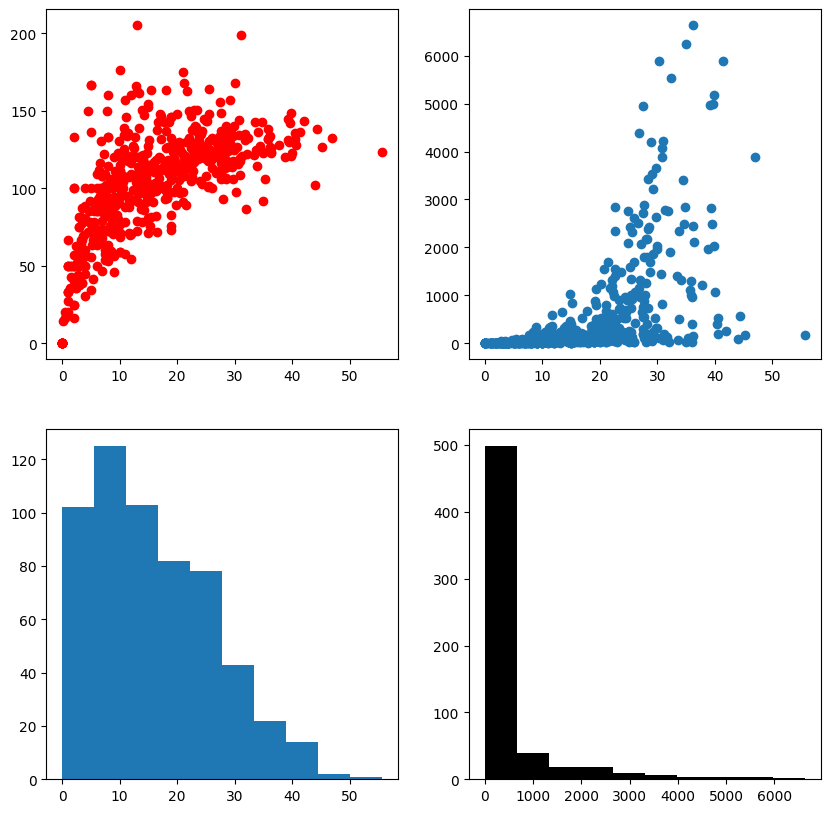

In [160]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax[0,0].scatter(batters['avg'],batters['strike_rate'],c='red')
ax[0,1].scatter(batters['avg'],batters['runs'])
ax[1,0].hist(batters['avg'])
ax[1,1].hist(batters['runs'],color='black')

(array([102., 125., 103.,  82.,  78.,  43.,  22.,  14.,   2.,   1.]),
 array([ 0.        ,  5.56666667, 11.13333333, 16.7       , 22.26666667,
        27.83333333, 33.4       , 38.96666667, 44.53333333, 50.1       ,
        55.66666667]),
 <BarContainer object of 10 artists>)

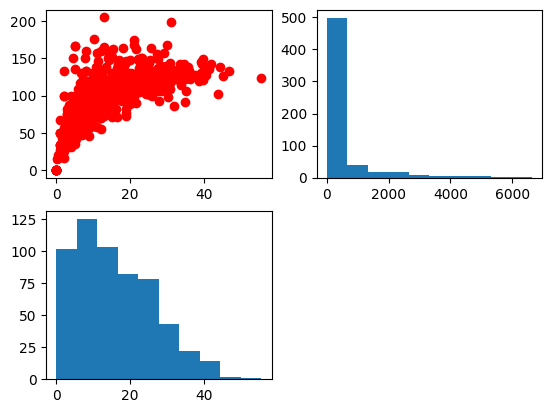

In [161]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.scatter(batters['avg'],batters['strike_rate'],color='red')

ax2 = fig.add_subplot(2,2,2)
ax2.hist(batters['runs'])

ax3 = fig.add_subplot(2,2,3)
ax3.hist(batters['avg'])

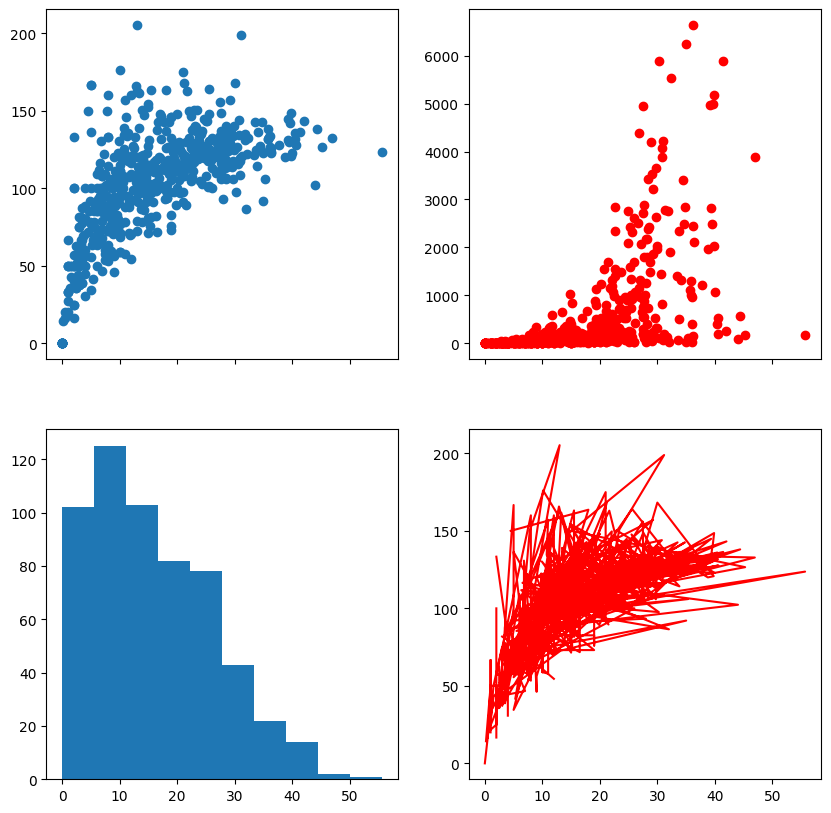

In [162]:
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(10,10))

ax[0,0].scatter(batters['avg'],batters['strike_rate'])
ax[0,1].scatter(batters['avg'],batters['runs'],color='red')
ax[1,0].hist(batters['avg'])
ax[1,1].plot(batters['avg'],batters['strike_rate'],color='red')



<Axes: >

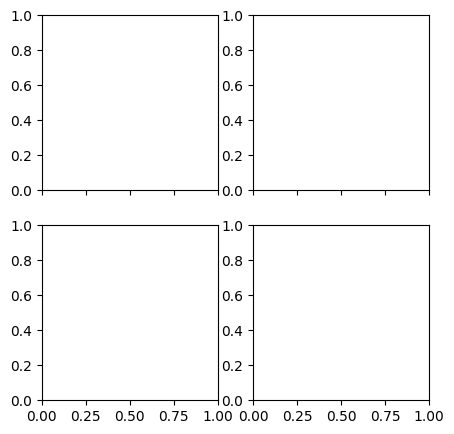

In [163]:
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(5,5))

ax[1,1]

### 3D Scatter Plots

<Axes3D: >

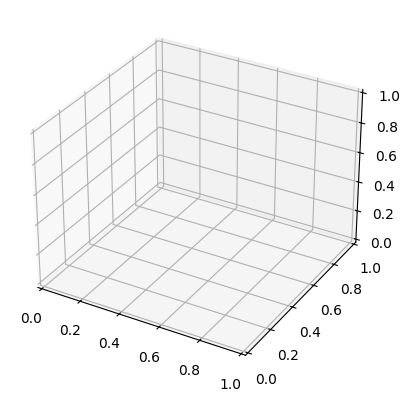

In [164]:
plt.subplot(projection='3d')

Text(0.5, 0, 'SR')

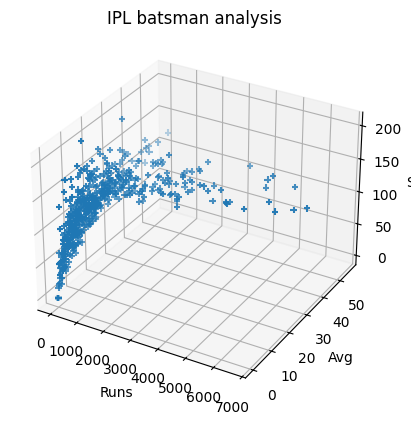

In [165]:
batters

fig = plt.figure()

ax = plt.subplot(projection='3d')

ax.scatter3D(batters['runs'],batters['avg'],batters['strike_rate'],marker='+')
ax.set_title('IPL batsman analysis')

ax.set_xlabel('Runs')
ax.set_ylabel('Avg')
ax.set_zlabel('SR')

### 3D Line Plot

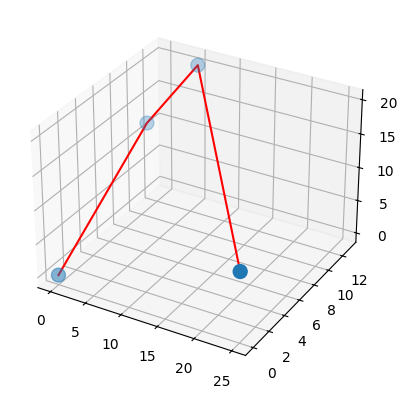

In [166]:
x = [0,1,5,25]
y = [0,10,13,0]
z = [0,13,20,9]

fig = plt.figure()

ax = plt.subplot(projection='3d')

ax.scatter3D(x,y,z,s=[100,100,100,100])
ax.plot3D(x,y,z,color='red')

### 3D Surface Plots

In [167]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

In [168]:
xx, yy = np.meshgrid(x,y)

In [169]:
z = xx**2 + yy**2
z.shape

(100, 100)

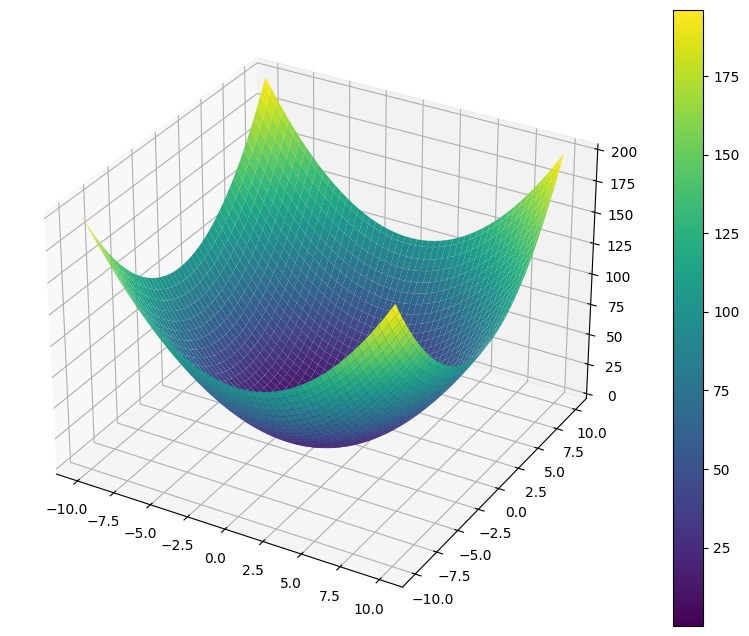

In [170]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(projection='3d')

p = ax.plot_surface(xx,yy,z,cmap='viridis')
fig.colorbar(p)

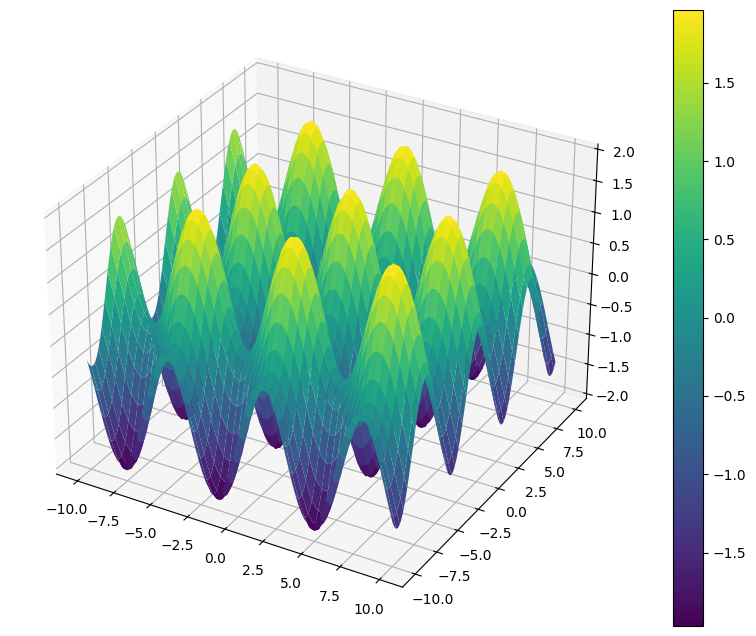

In [171]:
z = np.sin(xx) + np.cos(yy)

fig = plt.figure(figsize=(12,8))

ax = plt.subplot(projection='3d')

p = ax.plot_surface(xx,yy,z,cmap='viridis')
fig.colorbar(p)

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_91932/684431574.py:1: RuntimeWarning: invalid value encountered in log
  z = np.sin(xx) + np.log(xx)


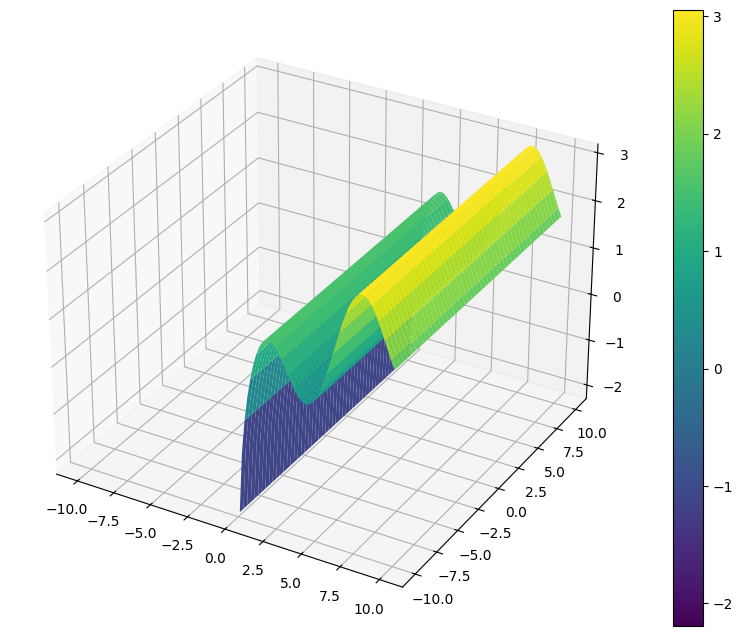

In [172]:
z = np.sin(xx) + np.log(xx)

fig = plt.figure(figsize=(12,8))

ax = plt.subplot(projection='3d')

p = ax.plot_surface(xx,yy,z,cmap='viridis')
fig.colorbar(p)

### Contour Plots

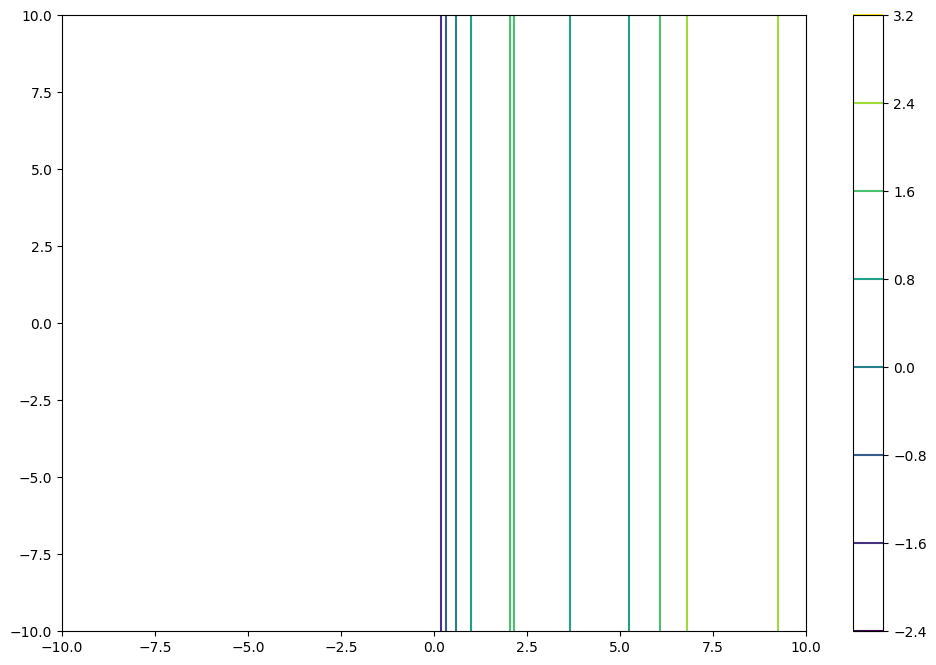

In [173]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot()

p = ax.contour(xx,yy,z,cmap='viridis')
fig.colorbar(p)

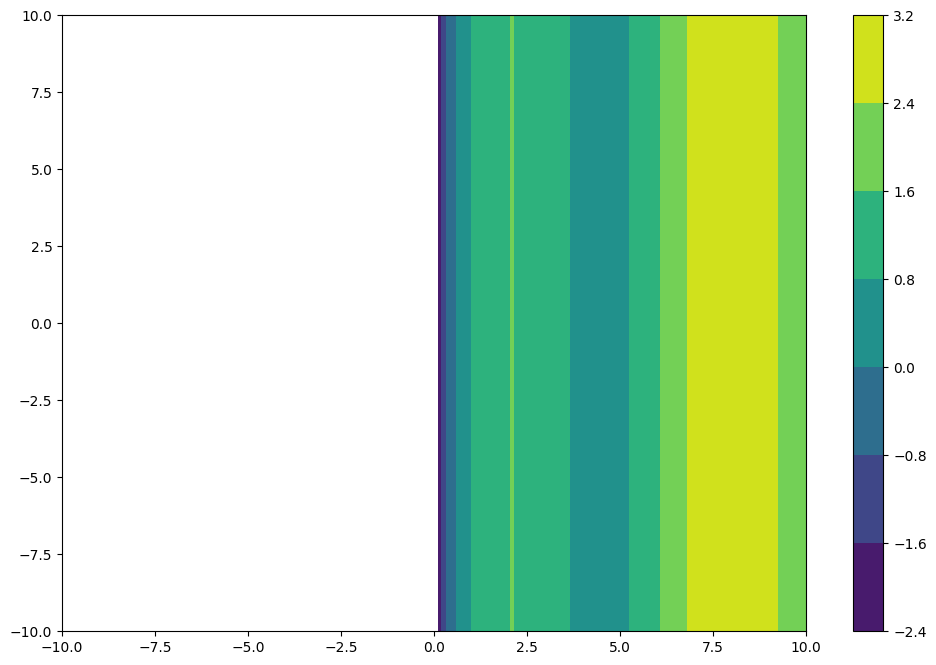

In [174]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot()

p = ax.contourf(xx,yy,z,cmap='viridis')
fig.colorbar(p)

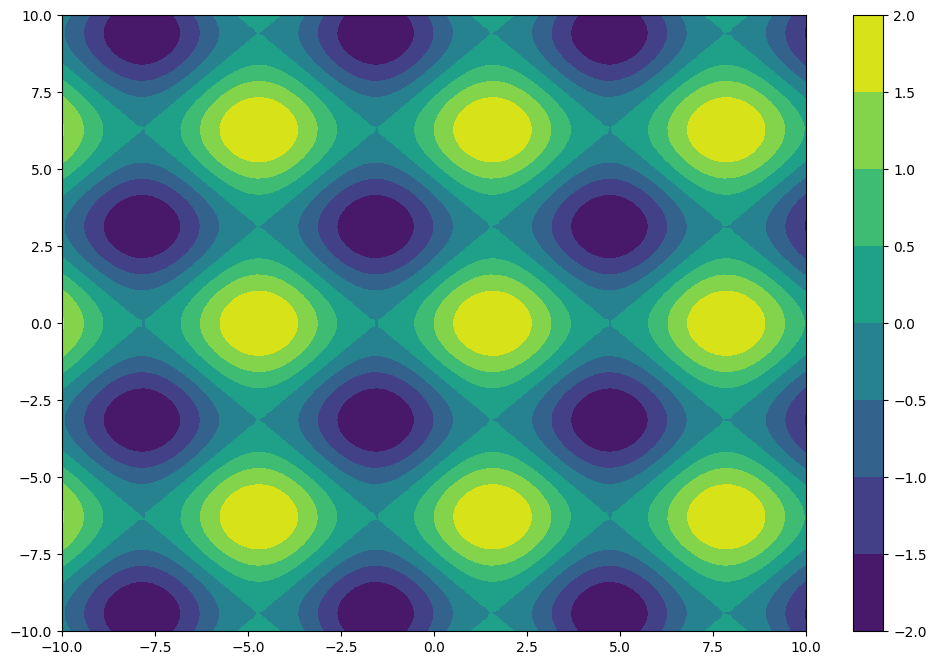

In [175]:
z = np.sin(xx) + np.cos(yy)

fig = plt.figure(figsize=(12,8))

ax = plt.subplot()

p = ax.contourf(xx,yy,z,cmap='viridis')
fig.colorbar(p)

### Heatmap

In [177]:
delivery = pd.read_csv('../datasets/IPL_Ball_by_Ball_2008_2022.csv')
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [181]:
temp_df = delivery[(delivery['ballnumber'].isin([1,2,3,4,5,6])) & (delivery['batsman_run']==6)]
temp_df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
16,1312200,1,2,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
22,1312200,1,3,5,YBK Jaiswal,Yash Dayal,JC Buttler,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
103,1312200,1,17,2,TA Boult,R Sai Kishore,R Parag,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
107,1312200,1,17,6,OC McCoy,R Sai Kishore,R Parag,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
142,1312200,2,3,5,MS Wade,M Prasidh Krishna,Shubman Gill,NaN,6,0,6,0,0,NaN,NaN,NaN,Gujarat Titans


In [183]:
grid = temp_df.pivot_table(index='overs',columns='ballnumber',values='batsman_run',aggfunc='count')
grid

ballnumber,1,2,3,4,5,6
overs,,,,,,
0,9,17,31,39,33,27
1,31,40,49,56,58,54
2,75,62,70,72,58,76
3,60,74,74,103,74,71
4,71,76,112,80,81,72
5,77,102,63,86,78,80
6,34,56,49,59,64,38
7,59,62,73,70,69,56
8,86,83,79,81,73,52


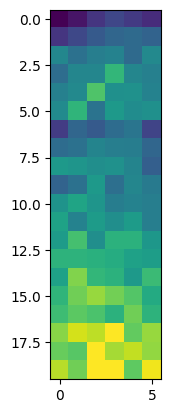

In [186]:
plt.imshow(grid)

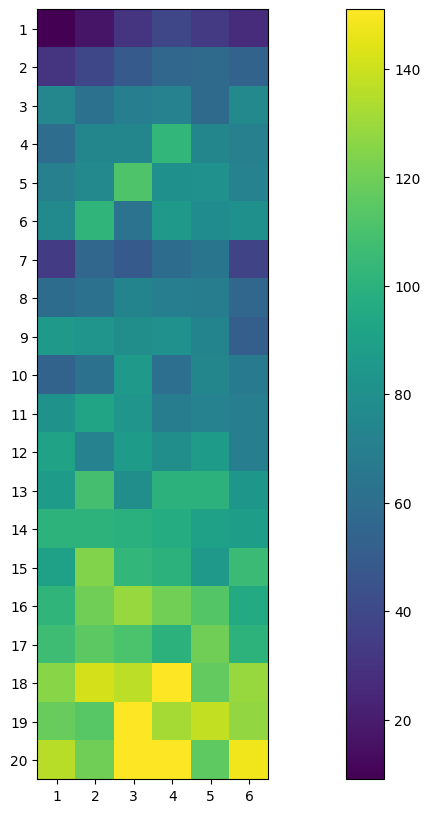

In [185]:
plt.figure(figsize=(20,10))
plt.imshow(grid)
plt.yticks(delivery['overs'].unique(), list(range(1,21)))
plt.xticks(np.arange(0,6), list(range(1,7)))
plt.colorbar()

### Pandas Plot()

<Axes: >

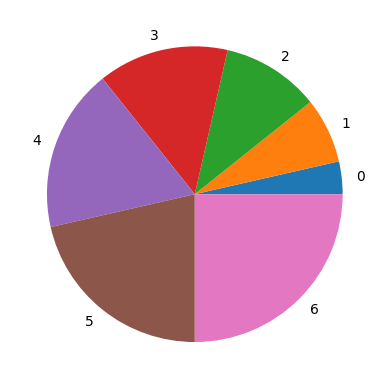

In [187]:
# on a series

s = pd.Series([1,2,3,4,5,6,7])
s.plot(kind='pie')